<a href="https://colab.research.google.com/github/bcury/Machine-Learning-Projects/blob/main/ML_Previs%C3%A3o_regressao_Aniversario_DecisionTree_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Daily Births Forecasting with Machine Learning**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
from datetime import date, time, datetime, timedelta
from dateutil.relativedelta import relativedelta

In [3]:
data = pd.read_csv('/content/daily-total-female-births-CA.csv')

In [4]:
data.shape

(365, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    365 non-null    object
 1   births  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [6]:
data.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


In [7]:
data.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [8]:
data

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
...,...,...
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55


In [45]:
data['date'] = pd.to_datetime(data.date, format='%Y-%d-%m')




In [46]:
data.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [47]:
x = data.iloc[:,0].values
y = data.iloc[:,1].values

In [48]:
x.shape

(365,)

In [49]:
x = x.reshape(-1,1)

In [50]:
x.shape

(365, 1)

In [51]:
y.shape

(365,)

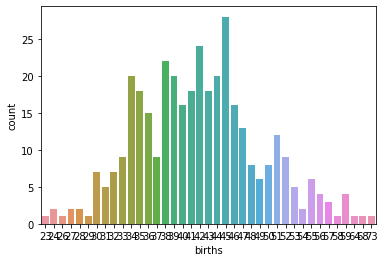

In [16]:
sns.countplot( x = data['births']);

In [17]:
data.isnull().sum()

date      0
births    0
dtype: int64

- treinamento

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x_treino, x_teste, y_treino, y_teste = train_test_split( x, y, test_size=0.25, random_state=0)

In [54]:
x_treino.shape

(273, 1)

In [55]:
y_treino.shape

(273,)

In [56]:
x_teste.shape

(92, 1)

In [57]:
y_teste.shape

(92,)

- previsao do modelo

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
regressao_linear = LinearRegression()

In [60]:
regressao_linear.fit(x_treino, y_treino)

LinearRegression()

In [64]:
regressao_linear.predict(np.array([[2012-11-11]]))

array([116.58373148])

- Decision Tree

In [65]:
from sklearn.tree import DecisionTreeRegressor

In [68]:
tree = DecisionTreeRegressor(criterion='mse')

In [69]:
tree.fit(x_treino, y_treino)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


DecisionTreeRegressor(criterion='mse')

In [70]:
previsao = tree.predict(x_teste)

In [71]:
previsao

array([32., 56., 47., 35., 41., 39., 41., 52., 41., 44., 51., 36., 39.,
       59., 44., 41., 42., 38., 46., 36., 41., 45., 30., 42., 36., 42.,
       45., 46., 54., 41., 47., 38., 45., 38., 52., 44., 45., 35., 73.,
       34., 45., 48., 41., 55., 52., 48., 46., 46., 41., 39., 33., 46.,
       39., 40., 41., 52., 52., 42., 50., 42., 40., 51., 38., 34., 45.,
       49., 37., 33., 34., 42., 27., 40., 35., 36., 34., 44., 42., 40.,
       42., 51., 52., 41., 43., 48., 37., 33., 59., 42., 43., 45., 45.,
       32.])

In [72]:
y_teste

array([42, 44, 52, 39, 36, 35, 39, 46, 42, 45, 32, 41, 59, 41, 28, 36, 47,
       34, 48, 55, 45, 45, 35, 38, 45, 53, 39, 44, 34, 47, 39, 34, 37, 51,
       42, 29, 28, 42, 55, 50, 39, 46, 50, 53, 34, 49, 39, 41, 51, 44, 47,
       44, 44, 35, 47, 45, 35, 38, 41, 46, 57, 47, 43, 53, 49, 43, 39, 38,
       38, 46, 30, 39, 37, 38, 36, 41, 43, 35, 40, 49, 53, 37, 39, 39, 52,
       36, 45, 35, 40, 50, 49, 39])

In [73]:
tree.score(x_treino, y_treino)

1.0

treino 100%, provavelmente o modelo sofreu de overfitting

In [77]:
tree.predict(np.array([[1955-11-11]]))

array([50.])